## Objectives 
 A consumer finance company which specialises in lending various types of loans to urban customers has to make a decision for loan approval based on the applicant’s profile.
     
## Business Understanding
 - If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

 - If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company
 
 - The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

## Data Understanding
 - The source data given contains the information about past loan applicants and whether they ‘defaulted’ or not.

# Loading Packages

In [1]:
import pandas as pd
import numpy as np

#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing Counter
#A counter is a container that stores elements as dictionary keys, and their counts are stored as dictionary values.
from collections import Counter

#set the max columns for displaying purpose
pd.set_option('display.max_columns', 130)

#Setting the style and color codes for sea born plots
sns.set(style="white", color_codes=True)

import warnings
warnings.filterwarnings('ignore')

 # Data Sourcing

In [2]:
#loading the data from loan.csv file using data type as unicode
data=pd.read_csv('C:/Users/richa.pandit/Documents/Python/loan/loan.csv',dtype='unicode')
print(data.shape)

(39717, 111)


<b>Observation</b>: We have 39717 rows and 111 columns in the dataset.

 # Data Cleaning

Task is to identify the required columns and rows for our analysis and clean the remaining data

In [3]:
#calculate the sum of null values in each column
data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


<b>Observation</b>: There are many columns whose value is null across all rows of the dataset. This means that these columns do not contain any data except null values. We can safely drop all such columns.

In [4]:
#No.of columns which had all data null
print(len(data.columns[data.isnull().sum()==data.shape[0]]))
#There are total 54 columns whose data is all null

#Dropping all those 54 columns
data.drop(data.columns[data.isnull().sum()==data.shape[0]],axis=1,inplace=True)
data.shape

54


(39717, 57)

<b>Observation</b>: Now shape is redued to 39717 rows and 57 columns

In [5]:
#let us check which columns are left after the removal of all null colummns
data.dtypes

id                            object
member_id                     object
loan_amnt                     object
funded_amnt                   object
funded_amnt_inv               object
term                          object
int_rate                      object
installment                   object
grade                         object
sub_grade                     object
emp_title                     object
emp_length                    object
home_ownership                object
annual_inc                    object
verification_status           object
issue_d                       object
loan_status                   object
pymnt_plan                    object
url                           object
desc                          object
purpose                       object
title                         object
zip_code                      object
addr_state                    object
dti                           object
delinq_2yrs                   object
earliest_cr_line              object
i

In [6]:
#Check distinct number of entries in our left over dataset
data.apply(pd.Series.nunique)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

<b>Observation</b>: id, member_id, url are having all distinct values. We will not be able to derive anything from url as url is having link with the same host name https://lendingclub.com/ and loan_id parameter as id of member all across the rows.
id and member_id are unique values across the dataset. They are also not useful for our analysis. So dropping them.

In [7]:
#Dropping id, member_id,  url
data.drop(['id','member_id','url'],axis=1,inplace=True)
data.shape

(39717, 54)

In [8]:
#Check if any column has same value across all rows
#In such case these columns can be ignored as they can not impact our analysis 
data.columns[data.apply(pd.Series.nunique) == 1]

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

<b>Observation</b>: There are 9 columns which have same value across all rows.

 #### Understand these columns first before removing them
 
 #### Column Name - pymnt_plan 
      Value - n 
      Description - Indicates if a payment plan has been put in place for the loan
      Analysis - This paramter makes more sense only after loan is approved. So no Impact

 #### Column Name - initial_list_status 
      Value - w,f
      Description - The initial listing status of the loan. Possible values are – W, F
      Analysis - Since all values are same, No Impact
      
 #### Column Name - collections_12_mths_ex_med 
      Value - 0 
      Description - Number of collections in 12 months excluding medical collections
      Analysis - The number of collections in the last 12 months is zero. So no Impact

 #### Column Name - policy_code 
      Value - 1 
      Description - publicly available policy_code=1, new products not publicly available policy_code=2
      Analysis - Since all values are same, No Impact

 #### Column Name - application_type
      Value - INDIVIDUAL
      Description - Indicates whether the loan is an individual application or a joint application with two co-borrowers
      Analysis - Since the data set contains only an individual loan type of application we can remove all the columns that are required only for joint applications

 #### Column Name - acc_now_delinq
      Value - 0
      Description - The number of accounts on which the borrower is now delinquent.
      Analysis - This says that there is not even a single account now where the borrower missed any regular payment cycle. So no impact.

 #### Column Name - chargeoff_within_12_mths 
      Value - 0 or NA
      Description - Number of charge-offs within 12 months
      Analysis - A charge-off usually occurs when the creditor has deemed an outstanding debt is uncollectible. Such case did not occur for any borrower in the last 12 months. So no impact.

 #### Column Name - delinq_amnt 
      Value - 0
      Description - The past-due amount owed for the accounts on which the borrower is now delinquent.
      Analysis - Since there is not even a single delinquent account there is no pending delinquent amount. So no impact.

 #### Column Name - tax_liens 
      Value - 0 or NA
      Description - Number of tax liens
      Analysis - Tax lien comes into picture only when delinquent amount is pending. Since it is 0, Tax lien is also 0. So no impact.


In [9]:
#remove all those columns which have same data all across rows
data.drop(data.columns[data.apply(pd.Series.nunique)==1],axis=1,inplace=True)
data.shape

(39717, 45)

<b>Observation</b>: We are left with 45 columns.

 #### KeyPoint: 
    Since application type is Individual, we will remove all the columns that are required only for joint applications
         - annual_inc_joint
         - dti_joint
         - verified_status_joint 
    We have already removed the above mentioned columns in our initial data cleaning process since they contain null value
    across all rows

In [10]:
#Let's move onto desc column
data.desc.head(10)

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
5                                                  NaN
6      Borrower added on 12/18/11 > I am planning o...
7      Borrower added on 12/16/11 > Downpayment for...
8      Borrower added on 12/21/11 > I own a small h...
9      Borrower added on 12/16/11 > I'm trying to b...
Name: desc, dtype: object

<b>Observation</b>: desc column is filled by borrower and it contains loan description provided by borrower.Desc column data contains the message and the date when it is added

 #### KeyPoint: This column is not required for our analysis and so we will remove it form data

In [11]:
data.drop('desc',axis=1,inplace=True)
data.shape
#now we have 44 columns for our analysis

(39717, 44)

In [12]:
#let us check purpose and title columns
print(data[['title','purpose']].head(10))

                                   title             purpose
0                               Computer         credit_card
1                                   bike                 car
2                   real estate business      small_business
3                               personel               other
4                               Personal               other
5  My wedding loan I promise to pay back             wedding
6                                   Loan  debt_consolidation
7                        Car Downpayment                 car
8   Expand Business & Buy Debt Portfolio      small_business
9            Building my credit history.               other


<b>Observation</b>: purpose seems to have definite data - from group of 14 categories.title is same as purpose- only difference is that it is entered by user.

 #### KeyPoint: Since purpose and title are almost similar and purpose has clear and short description than title, we can remove title from our data

In [13]:
data.drop('title',inplace=True,axis=1)
data.shape
#We have now 43 columns

(39717, 43)

 ### Remove extra characters if there are any

<b>Observation</b>: '%' sign in present in two columns(revol_util,int_rate) which is not needed. So converting them in to numeric columns.

In [14]:
#we have '%' sign in two columns(revol_util,int_rate) which is not needed. So we can convert them in to numeric columns
data['revol_util'] = data['revol_util'].str.rstrip('%').astype('float')
data['int_rate'] = data['int_rate'].str.rstrip('%').astype('float')

 ## Let us build correlation matrix for the below columns 

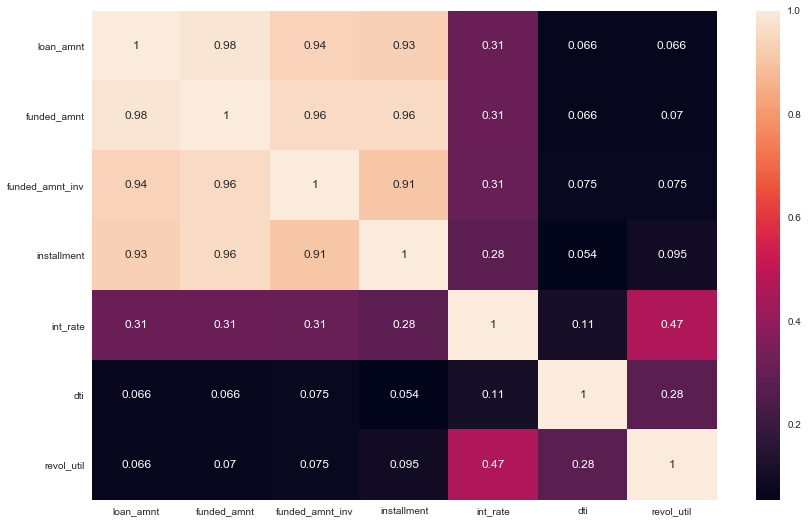

In [90]:
#Changing the data types to float for below columns
data['loan_amnt']=data['loan_amnt'].astype(float)
data['funded_amnt']=data['funded_amnt'].astype(float)
data['funded_amnt_inv']=data['funded_amnt_inv'].astype(float)
data['installment']=data['installment'].astype(float)
data['dti']=data['dti'].astype(float)

corr_col = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'int_rate', 'dti', 'revol_util']

f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(data[corr_col].corr(), 
            xticklabels=data[corr_col].corr().columns.values,
            yticklabels=data[corr_col].corr().columns.values,annot= True)
plt.show()

 <b>Observation</b>:loan_amnt,funded_amnt,funded_amnt_inv,installment are highly correlated.
 
 #### KeyPoint:  loan_amnt,funded_amnt,funded_amnt_inv and installment are highly correlated. So we can drop funded_amnt_inv, funded_amnt and installment.

In [15]:
data.drop(['funded_amnt_inv','funded_amnt','installment'],inplace=True,axis=1)
data.shape
#We have now 40 columns

(39717, 40)

<b>Observation</b>: 
We are not worried about what the investors will get and what they will invest. As we are looking at the amount funded to borrower irrespective of who provided it and how much he/she provided it, we can remove all the columns that are specific to investors
 - out_prncp_inv - Remaining outstanding principal for portion of total amount funded by investors
 - total_pymnt_inv - Payments received to date for portion of total amount funded by investors

In [16]:
remove_investor_col= ['out_prncp_inv','total_pymnt_inv']
data.drop(remove_investor_col,inplace=True,axis=1)
data.shape

(39717, 38)

In [17]:
#Analyzing emp_title column
#Counting the number of emp_title column values. Counter stores element as key and their counts as values.
emp_title_count = Counter(list(data['emp_title']))
emp_title_count.most_common(15)

[(nan, 2459),
 ('US Army', 134),
 ('Bank of America', 109),
 ('IBM', 66),
 ('AT&T', 59),
 ('Kaiser Permanente', 56),
 ('USAF', 54),
 ('Wells Fargo', 54),
 ('UPS', 53),
 ('US Air Force', 52),
 ('Walmart', 45),
 ('Lockheed Martin', 44),
 ('United States Air Force', 42),
 ('State of California', 42),
 ('U.S. Army', 41)]

<b>Observation</b>: emp_title is filled up by borrower and contains most of the values as null.

In [18]:
#We will drop emp_title column
data.drop('emp_title',axis=1,inplace=True)
data.shape

(39717, 37)

 #### We have now 37 columns

In [19]:
#Lets check if there are any derived columns in the dataset
data[['loan_amnt','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries']].head(5)

,loan_amnt,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries
0,5000,5863.155187,5000,863.16,0,0
1,2500,1008.71,456.46,435.17,0,117.08
2,2400,3005.666844,2400,605.67,0,0
3,10000,12231.89,10000,2214.92,16.97,0
4,3000,3513.33,2475.94,1037.39,0,0


 <b>Observation</b>: By looking at the data we can see that, total_pymnt = total_rec_prncp + total_rec_int + total_rec_late_fee + recoveries
 
 As we already have interest % in data,We dont need explicit distinction of all these columns. So We will remove  total_rec_prncp, total_rec_int, total_rec_late_fee

In [20]:
#dropping total_rec_int,total_rec_prncp,total_rec_late_fee,recoveries
data.drop(['total_rec_int','total_rec_prncp','total_rec_late_fee','recoveries'],axis=1,inplace=True)
data.shape

(39717, 33)

In [21]:
#Check the available values and counts for loan_status column
data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

 <b>Observation</b>: If the loan status is Current that means Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'. So we can not consider them for our analysis.
 
 #### KeyPoints :
 1. Filter all rows that contains Current loan status. We are not interested in these rows
 2. Identify those columns that actually makes sense only if the loan status type is Current and remove them.
     - out_prncp - Remaining outstanding principal for total amount funded
     - next_pymnt_d - Next scheduled payment date

In [22]:
#Filter out all rows containing Current as Loan Status
data=data[data['loan_status']!='Current']
data.shape
#Rows should be Total rows - Current loan status rows = 39717-1140 = 38577

(38577, 33)

In [23]:
#Remove columns out_prncp and next_pymnt_d
remove_currstatus_col= ['out_prncp','next_pymnt_d']
data.drop(remove_currstatus_col,inplace=True,axis=1)
data.shape

(38577, 31)

In [24]:
#Check the number of null values in each column
data.isnull().sum()

loan_amnt                      0
term                           0
int_rate                       0
grade                          0
sub_grade                      0
emp_length                  1033
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     24905
mths_since_last_record     35837
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
total_pymnt                    0
collection_recovery_fee        0
last_pymnt_d                  71
last_pymnt_amnt                0
last_credit_pull_d             2
pub_rec_ba

<b>Observation</b>: Last payment amount and Last payment date are not required as we already have total payment done against the
    loan amount.


In [25]:
#Dropping last_pymnt_amnt,last_pymnt_d
data.drop(['last_pymnt_amnt','last_pymnt_d'],inplace=True,axis=1)
data.shape

(38577, 29)

 #### Now the dataset contains 29 columns

In [26]:
#Lets analyze the remaining 30 columns in dataset
data.dtypes

loan_amnt                   object
term                        object
int_rate                   float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                  object
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
zip_code                    object
addr_state                  object
dti                         object
delinq_2yrs                 object
earliest_cr_line            object
inq_last_6mths              object
mths_since_last_delinq      object
mths_since_last_record      object
open_acc                    object
pub_rec                     object
revol_bal                   object
revol_util                 float64
total_acc                   object
total_pymnt                 object
collection_recovery_fee     object
last_credit_pull_d          object
pub_rec_bankruptcies

 ### Check remaining columns. If not required, remove them

In [40]:
SumOfGrades = data.groupby(['grade'])
plt.figure(figsize=(10, 10))
bplot = sns.boxplot(y='int_rate', x=SumOfGrades, data = data, width=0.5,palette="OrRd")

TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed

<Figure size 720x720 with 0 Axes>

In [103]:
#Function to calculate mean of grouped data
def groupByMean(groupByCol,meanColumn,xtitle,ytitle):
    groupByData = data.groupby([groupByCol])[meanColumn].mean().reset_index()
    fig, ax = plt.subplots()
    ax=sns.barplot(x=groupByCol,y=meanColumn,data=groupByData)
    ax.set_ylabel(ytitle,fontsize=15)
    ax.set_xlabel(xtitle,fontsize=15)
    plt.show()
    
#Function to calculate count of grouped data
def groupByCount(df,groupByCol,countColumn,xtitle,ytitle):
    groupByData = df.groupby([groupByCol])[countColumn].count().reset_index()
    fig, ax = plt.subplots()
    fig.set_size_inches(20, 11)
    ax=sns.barplot(x=groupByCol,y=countColumn,data=groupByData)
    ax.set_ylabel(ytitle,fontsize=15)
    ax.set_xlabel(xtitle,fontsize=15)
    plt.show()

 #### check if grade and sub-grade columns are redundant

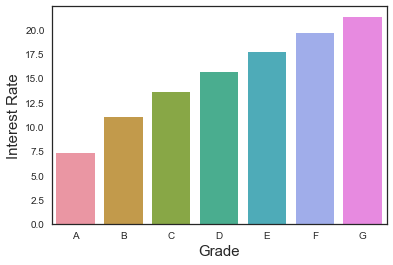

In [104]:
#Let us analyze the impact of grade on Interest rate column
groupByMean('grade','int_rate','Grade','Interest Rate')

Observation: Interest rate increases with Grade

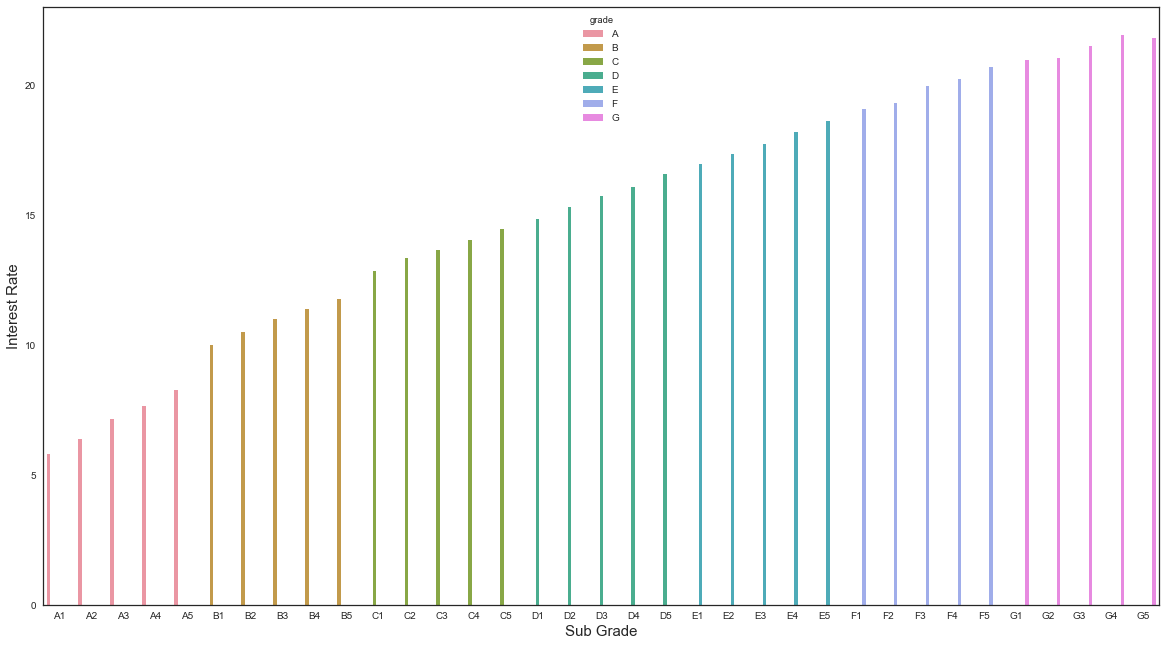

In [105]:
#Plot the sub-grade vs Interest rate column
fig, g = plt.subplots()
fig.set_size_inches(20, 11)
groupBySubGrade = data.groupby(['grade','sub_grade'])['int_rate'].mean().reset_index()
g=sns.barplot(x='sub_grade',y='int_rate',hue='grade',data=groupBySubGrade)
g.set_ylabel('Interest Rate',fontsize=15)
g.set_xlabel('Sub Grade',fontsize=15)
plt.show()

 Observation: Interest rate increases with Sub Grade.

 #### KeyPoint: Interest rate increases with SubGrade and Grade. So retain only 'Grade' for Analysis.

In [106]:
#drop sub-grade column
data.drop(['sub_grade'],inplace=True,axis=1)

 ### Check if dti and grade columns are correlated

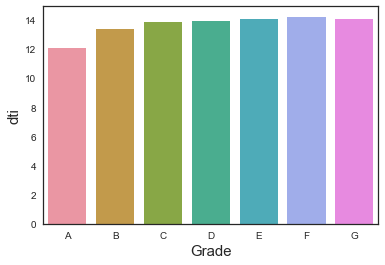

In [107]:
#Let us analyze the impact of grade on dti column
groupByMean('grade','dti','Grade','dti')

<b>Observation</b>: dti increases as Grade increases

 ### Check if grade and revol_util columns are correlated

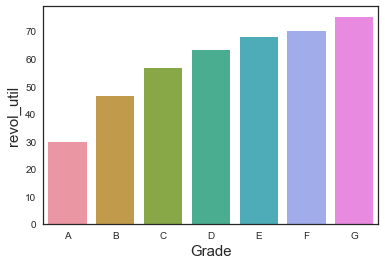

In [108]:
#Let us analyze the impact of grade on revol_util column
groupByMean('grade','revol_util','Grade','revol_util')

<b>Observation</b>: revol_util increases as Grade increases

 ### Check if grade and revol_bal columns are correlated

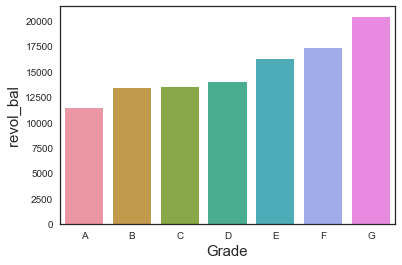

In [109]:
#Let us analyze the impact of grade on revol_bal column
data['revol_bal']=data['revol_bal'].astype(float)
groupByMean('grade','revol_bal','Grade','revol_bal')

<b>Observation</b>: revol_bal increases as Grade increases

 #### KeyPoint: dti, revol_util,revol_bal and interest rates increase with Grade. So we can remove dti, int_rate and revol_util and just keep "grade" as a key term.

In [110]:
#drop dti,int_rate,revol_util,revol_bal column
data.drop(['dti','int_rate','revol_util','revol_bal'],inplace=True,axis=1)
data.shape

(38577, 24)

In [111]:
#Lets check if zipcode has any impact on loan status
groupedZipcode = data.groupby("loan_status").agg({"zip_code": pd.Series.nunique})
groupedZipcode

,zip_code
loan_status,
Charged Off,666
Fully Paid,814


<b>Observation</b>: There are many unique zip codes for each of the loan_status. Since addr_state is available in the data for our analysis, we will be removing this column.

In [112]:
#drop zip_code column
data.drop(['zip_code'],inplace=True,axis=1)
data.shape

(38577, 23)

<b>Observation</b> :We have now 23 columns

### Let us check other remaining columns before removing them
 
 #### Column Name - total_pymnt 
      Description - Payments received to date for total amount funded
      Analysis - This parameter makes more sense only after loan is approved. So no Impact.

 #### Column Name - collection_recovery_fee
      Description - post charge off collection fee
      Analysis - This comes into picture only after loan is approved. So no impact.

In [113]:
#remove total_pymnt,collection_recovery_fee
data.drop(['total_pymnt','collection_recovery_fee'],inplace=True,axis=1)
data.shape

(38577, 21)

In [114]:
#Convert month number to month name
import calendar
def convertToMonthName(x):
    return calendar.month_abbr[x]

 ### Check the impact of issue date,earliest_cr_line and last credit pull date on loan status

In [115]:
#We are deriving new columns 'month' and 'year'.
data['issue_month'],data['issue_year'] = data['issue_d'].str.split('-', 1).str
data['last_credit_month'],data['last_credit_year'] = data['last_credit_pull_d'].str.split('-', 1).str
data['earliest_cr_line_mnth'],data['earliest_cr_line_yr'] = data['earliest_cr_line'].str.split('-', 1).str

#Convert month number to month name
data['issue_month'] = data.issue_month.map(lambda x: convertToMonthName(x) if isinstance(x, int) else x)
data['last_credit_month'] = data.last_credit_month.map(lambda x: convertToMonthName(x) if isinstance(x, int) else x)
data['earliest_cr_line_mnth'] = data.last_credit_month.map(lambda x: convertToMonthName(x) if isinstance(x, int) else x)

In [116]:
#Calculate the Charged off percentage
def groupedDF_ChargedOffPerc(df,groupedByCols,aggCol):
    groupByDF = df.groupby(groupedByCols).agg({aggCol: 'count'})
    #To prepare for plotting,Transforming groupByDF dataframe to separate each sector by columns , instead of by index  
    groupByDF = groupByDF.unstack(level=1)
    #Also drop aggreagated column name because the unstack() operation creates a MultiIndex
    groupByDF.columns = groupByDF.columns.droplevel(level=0)
    #Calculate Charged Off percentage
    groupByDF['Charged Off Perc']=(groupByDF['Charged Off']/(groupByDF['Charged Off']+groupByDF['Fully Paid']))*100
    return groupByDF

#Plot Month wise data
def plotMonthWiseData(df,groupedByCols,aggCol):
    groupByMonthDF = groupedDF_ChargedOffPerc(df,groupedByCols,aggCol)
    #sort the month index categorically
    groupByMonthDF.index= pd.CategoricalIndex(groupByMonthDF.index, categories=['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
 sorted=True)
    groupByMonthDF.sort_index(inplace=True)
    plottingData(groupByMonthDF,groupedByCols[0])
    return

#Plot Year wise data
def plotYearWiseData(df,groupedByCols,aggCol):
    groupByYearDF = groupedDF_ChargedOffPerc(df,groupedByCols,aggCol)
    groupByYearDF.sort_index(inplace=True)
    plottingData(groupByYearDF,groupedByCols[0])
    return

#Plotting the data
def plottingData(plotDF,xlabel):
    plotDF.index.unique()
    fig, ax = plt.subplots()
    fig.set_size_inches(13, 11)
    ax = sns.barplot(plotDF.index, y="Charged Off Perc", data=plotDF)
    ax.set_ylabel('Charged Off Percentage',fontsize=15)
    ax.set_xlabel(xlabel,fontsize=15)
    ax.set_title(xlabel + ' vs Charged Off Percentage')
    return 

### Let us check if there is an impact of Issue date on loan status

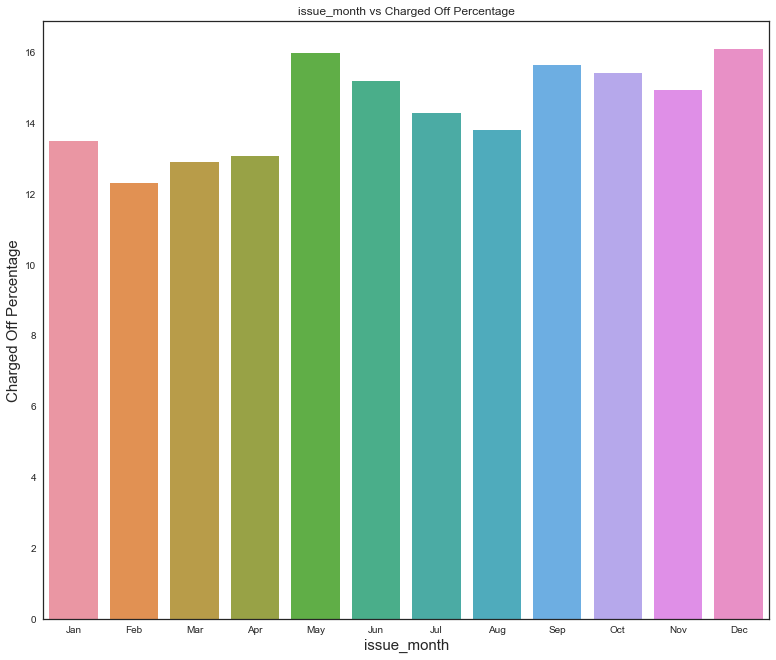

In [117]:
#Plot issue date vs charged off percentage
plotMonthWiseData(data,['issue_month','loan_status'],'loan_status')

<b>Observation</b>: We can not distinguish clearly which issue month has highest percentage of Charged Off loan status. So we can not use this for our analysis. so remove the column issue_d.

In [118]:
#drop the issue_d column and derived columns
data.drop(['issue_d','issue_month','issue_year'],inplace=True,axis=1)
data.shape

(38577, 24)

### Let us check if there is an impact of Last Credit Pull date on loan status

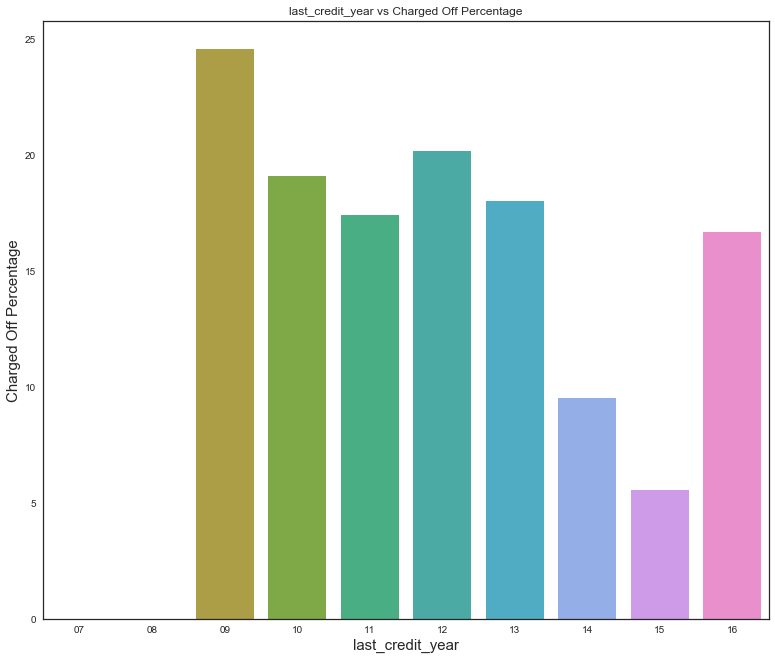

In [119]:
plotYearWiseData(data,['last_credit_year','loan_status'],'loan_status')

<b>Observation</b>:There were more charged-off in 2009. That might be due to Global Financial Crisis around that period. So we will not be considering this field for our analysis.

Link that supports 2009 Global Financial Crisis : https://en.wikipedia.org/wiki/Global_financial_crisis_in_2009

In [120]:
data.drop(['last_credit_pull_d','last_credit_month','last_credit_year'],inplace=True,axis=1)
data.shape

(38577, 21)

 ### Let us check if there is an impact of Earliest credit line on Charged Off loan status

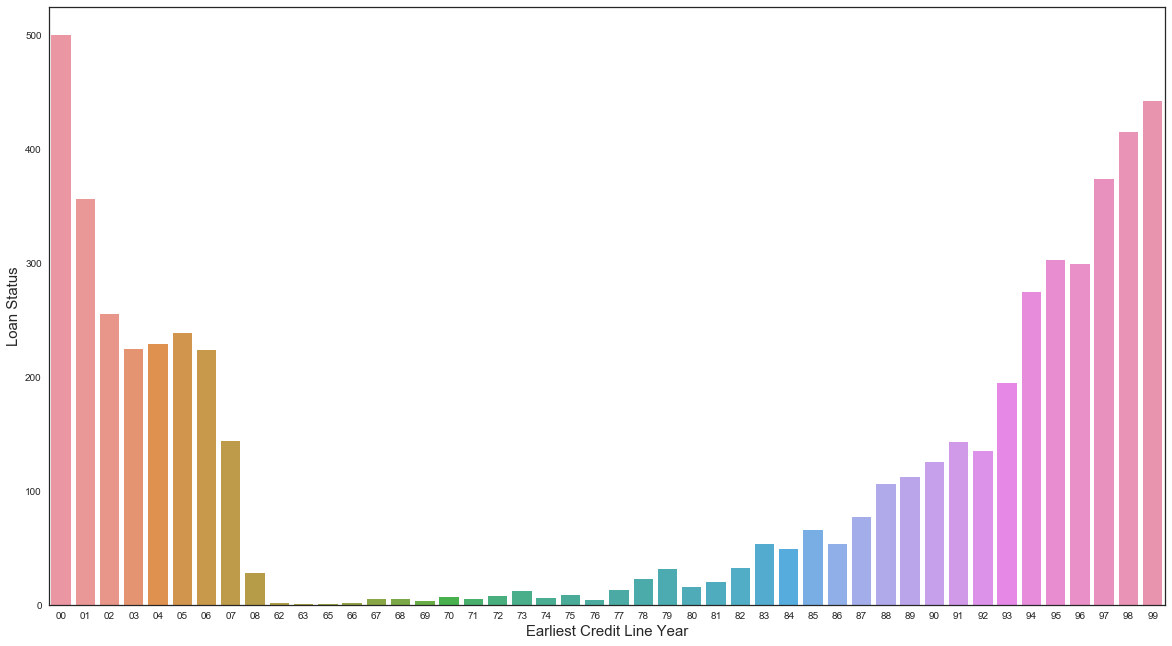

In [121]:
#Plot Last Credit Pull Year vs Charged Off Loan Status count
dataChargedOff=data[data['loan_status']=='Charged Off']
groupByCount(dataChargedOff,'earliest_cr_line_yr','loan_status','Earliest Credit Line Year','Loan Status')

<b>Observation</b>: Usually age of the borrower is significantly related to credit risk. Since we dont have the age of the borrowers, we can use Earliest Credit Line as a proxy for age. The above graph shows the distribution of charged off loans by borrowers' earliest credit line for each application year. It indicates that borrowers who established credit line in 2000 have the biggest share of Charged-Off loans. We have gained no additional insights from this chart.

In [122]:
#drop the earliest_cr_line column and derived columns
data.drop(['earliest_cr_line','earliest_cr_line_mnth','earliest_cr_line_yr'],inplace=True,axis=1)
data.shape

(38577, 18)

 ### Now there are 18 columns in the dataset

In [123]:
#Check how much null data is there
null_data = data.isnull().sum()
null_data

loan_amnt                     0
term                          0
grade                         0
emp_length                 1033
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
addr_state                    0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq    24905
mths_since_last_record    35837
open_acc                      0
pub_rec                       0
total_acc                     0
pub_rec_bankruptcies        697
dtype: int64

<b>Observation</b>:mths_since_last_delinq and mths_since_last_record has max number of values as null.
 
 #### Let us check the impact of these two columns

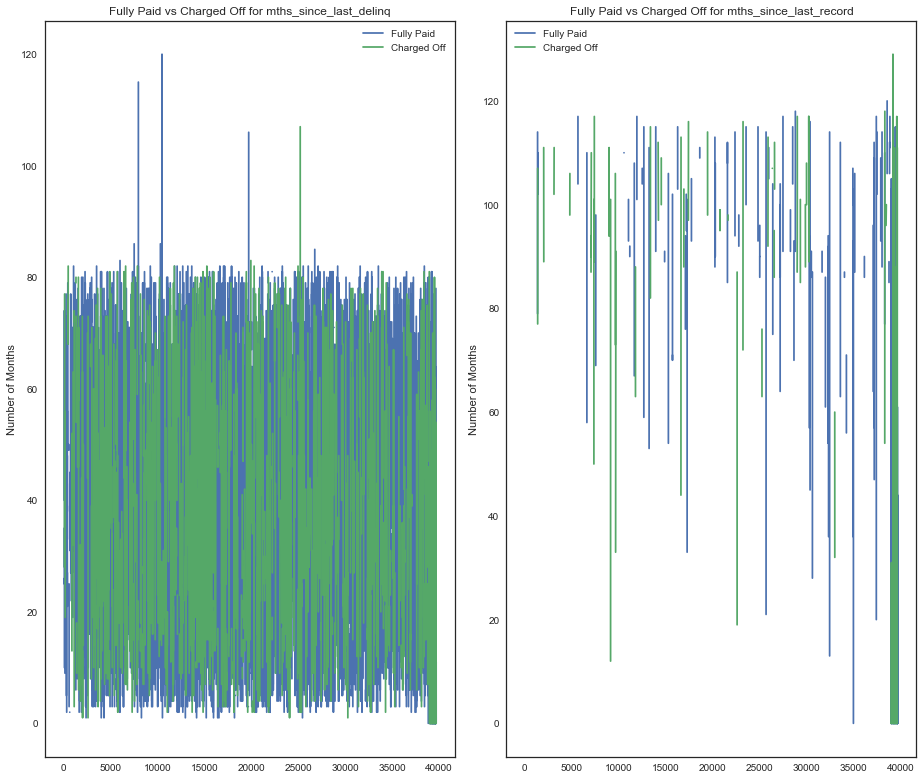

In [124]:
def subplotgraph(x1,x2,ax,ycol):
    plt.plot(x1, label = "Fully Paid") 
    plt.plot(x2, label = "Charged Off")
    ax.set_xticklabels([])
    # naming the y axis
    plt.ylabel('Number of Months')
    # giving a title to the graph
    plt.title('Fully Paid vs Charged Off for '+ycol)
    plt.legend() 
    
#Get the data for Fully Paid Loan Status
dataFullyPaid=data[data['loan_status']=='Fully Paid']
#Get the data for Charged Off Loan Status
dataChargedOff=data[data['loan_status']=='Charged Off']
 
fig, ax = plt.subplots()
fig.set_size_inches(13, 11)

#First Sub plot for mths_since_last_delinq
plt.subplot(1, 2, 1)
x1 = dataFullyPaid['mths_since_last_delinq']
x2 = dataChargedOff['mths_since_last_delinq']
subplotgraph(x1,x2,ax,'mths_since_last_delinq') 

#Second Sub plot for mths_since_last_record
plt.subplot(1, 2, 2)
x1 = dataFullyPaid['mths_since_last_record']
x2 = dataChargedOff['mths_since_last_record']
subplotgraph(x1,x2,ax,'mths_since_last_record') 

plt.tight_layout()
# function to show the plot
plt.show()


<b>Observation</b> : mths_since_last_delinq and mths_since_last_record do not have any impact on our analysis. So removing these two columns

In [125]:
#dropping mths_since_last_delinq and mths_since_last_record
data.drop(['mths_since_last_delinq','mths_since_last_record'],inplace=True,axis=1)
data.shape

(38577, 16)

 ### We have now 16 columns

In [126]:
data.dtypes

loan_amnt               float64
term                     object
grade                    object
emp_length               object
home_ownership           object
annual_inc               object
verification_status      object
loan_status              object
purpose                  object
addr_state               object
delinq_2yrs              object
inq_last_6mths           object
open_acc                 object
pub_rec                  object
total_acc                object
pub_rec_bankruptcies     object
dtype: object

 ### Let us analyze these remaining 16 columns and check if anything can be removed

Let us analyze categorical features using frequency tables and bar plot.

We will use 2 ways to analyze categorical data and their effect on loan charge off.

1. A function to plot count bar graph against loan_status -- to see if a particular categorical value has more no of charge offs.

2. For some categorical features , we will look at their effect on ratio of charge off loans to total loans i.e. chance of a loan being coverted to charge off.

In [127]:
def uni_categorical(df,col,hue):
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 6 + 4*len(temp.unique())
    fig.set_size_inches(width , 7)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue)

def crosstab(df,col):
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Charged Off Chance'] = round((crosstab['Charged Off']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab

def bivariate_prob(df,col,stacked= True):
    plotCrosstab = crosstab(df,col)
    linePlot = plotCrosstab[['Charged Off Chance']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Charge Off Chance',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Charged off Chance',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()

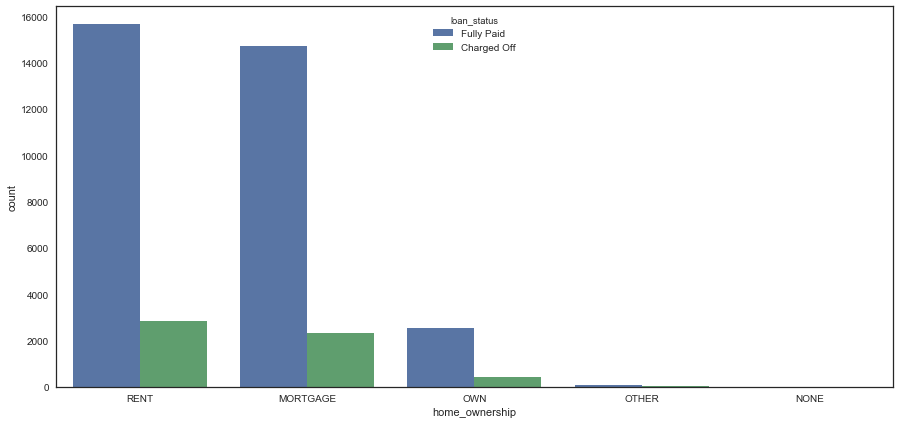

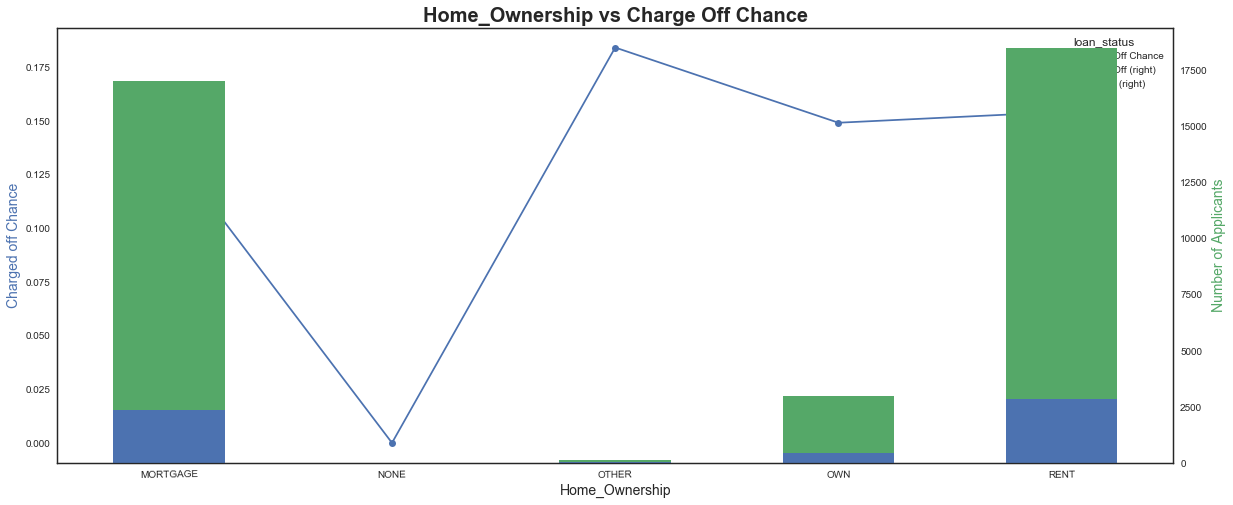

In [128]:
#Let us check first for home_ownership
#Univariate analysis for home_ownership
uni_categorical(data,'home_ownership','loan_status')
#Bivariate analysis for home_ownership
bivariate_prob(data,'home_ownership')

<b>Observation</b> :
1. Most of applicants have Mortgage and Rent.
2. Charge Off chance does decrease a bit with Owning home but not very significant.
3. There is not much info which can be pulled here in context of Charge Off.

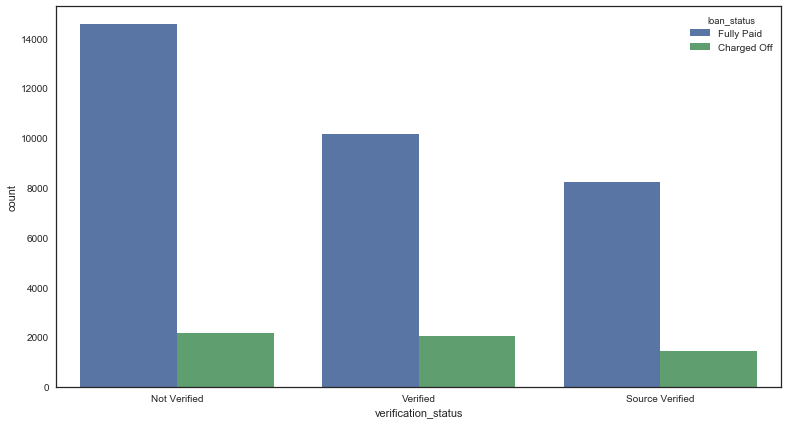

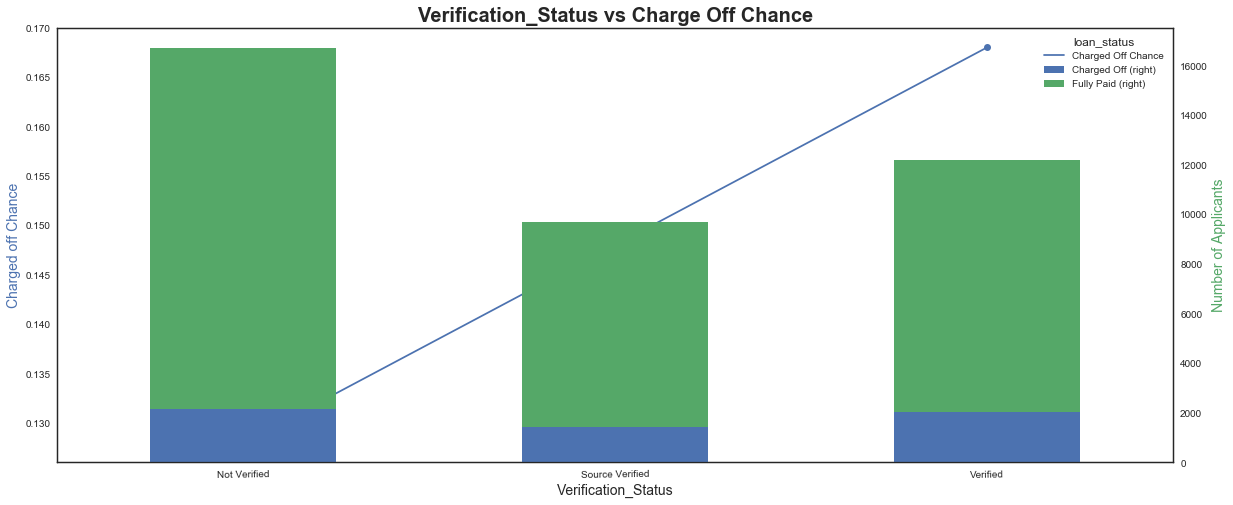

In [129]:
#Univariate analysis for verification_status
uni_categorical(data,'verification_status','loan_status')
#Bivariate analysis for verification_status
bivariate_prob(data,'verification_status')

<b>Observation</b>:
1. Expectation was that verified accounts would have lesser charge off but that is not the case as evident from above.
2. Verification status cannot form basis for charge off prediction.

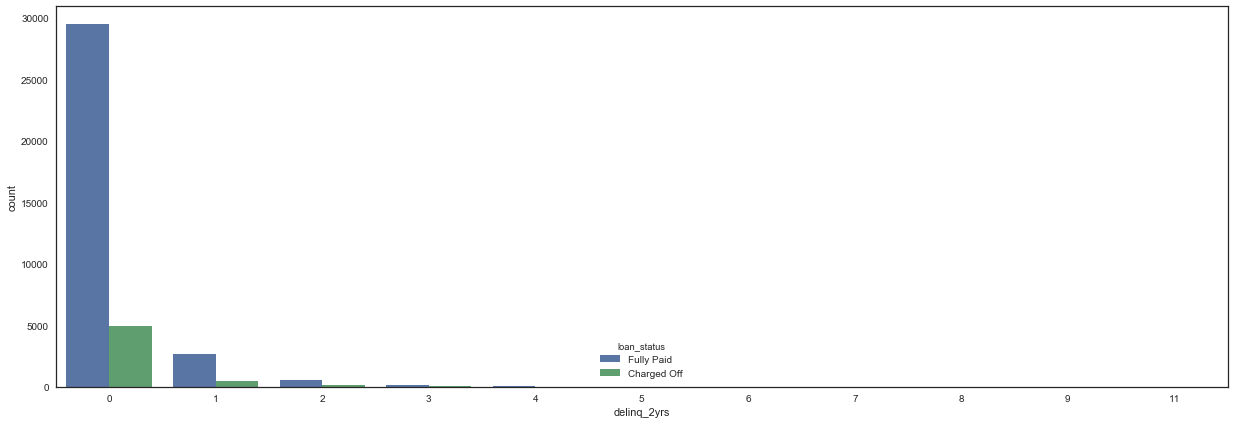

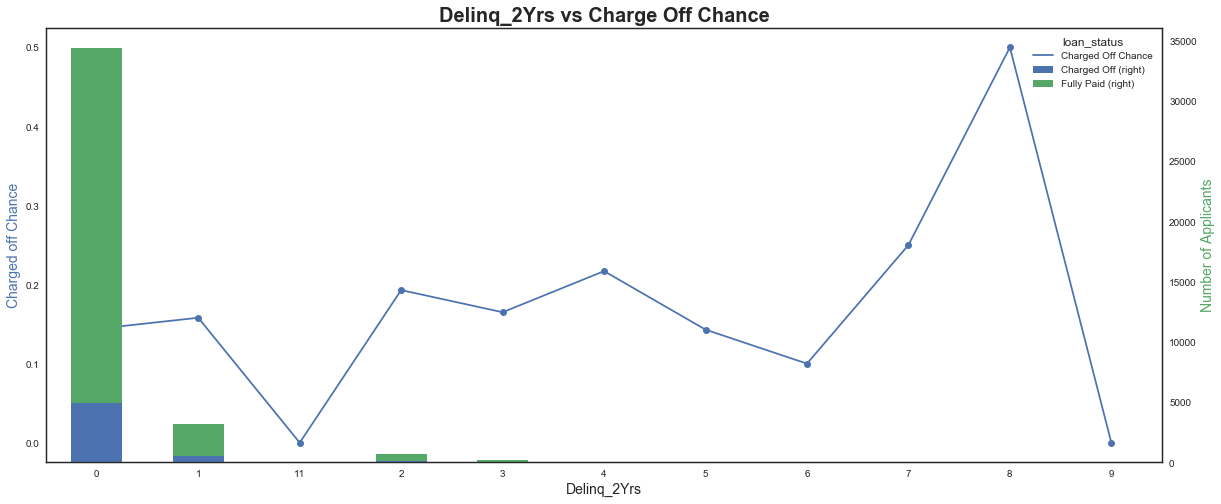

In [130]:
#Univariate analysis for delinq_2yrs
uni_categorical(data,'delinq_2yrs','loan_status')
#Bivariate analysis for delinq_2yrs
bivariate_prob(data,'delinq_2yrs')

<b>Observation</b> :
1. No of incidences of delinquency should have made a good basis for charge off decision.
2. But the pattern above does not give a clear picture. Expectation was that charge off chance would increase with no of delinquency but that not what pattern suggests.

Similar behavior is observed for 'inq_last_6mths', 'open_acc','total_acc','pub_rec','chargeoff_within_12_mths'. It has not been plotted but they do not add much value.

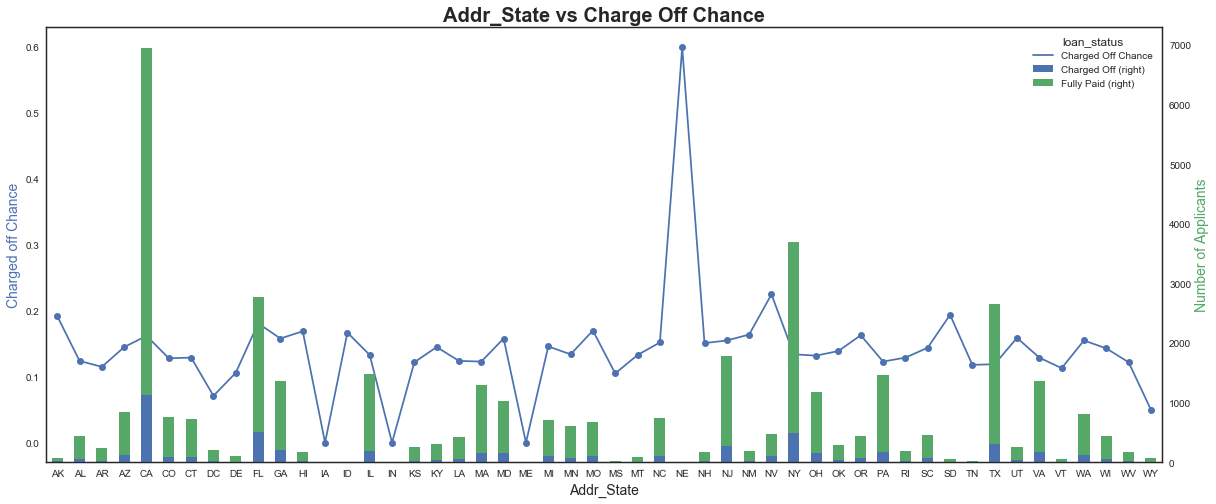

In [131]:
#Let us do analyis on state now 
#Bivariate analysis for addr_state
bivariate_prob(data,'addr_state')

<b>Observation</b> :
1. NE has highest chance of charge off which is almost 3 times the mean.
2. Absolute number from NE is very low as compared to other states; hence we can ignore this observation.
3. CA state has the largest number of population in united states; hence we can ignore this observation. Link to support this : https://www.google.co.in/search?q=LARGEST+population+state+in+USA&oq=largest+&aqs=chrome.1.69i57j69i59.2069j0j4&sourceid=chrome&ie=UTF-8

Significant relation cannot be established between loan charge off and state.

In [132]:
unwanted_cols=['inq_last_6mths','open_acc','total_acc','pub_rec','verification_status','delinq_2yrs','addr_state']
data.drop(unwanted_cols,inplace=True,axis=1)
data.shape

(38577, 9)

In [133]:
data.dtypes

loan_amnt               float64
term                     object
grade                    object
emp_length               object
home_ownership           object
annual_inc               object
loan_status              object
purpose                  object
pub_rec_bankruptcies     object
dtype: object

 ## Finally we are down to 9 columns. Let us perform some analysis to determine the impact

 ### Let us create bins for loan_amnt, annual_inc.

In [134]:
#creating bins
def createbins(param):
    bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
    slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
    return pd.cut(data[param], bins, labels=slot)

In [135]:
#Checking IQR for loan_amnt to spot any outliers.
data['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [136]:
#creating bins for loan_amnt
data['loan_amnt_range'] = createbins('loan_amnt')

In [137]:
#Checking IQR for annual_inc to spot any outliers.
data['annual_inc'] =data['annual_inc'].astype(float)
data['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<b>Observation</b>: Maximum value of annual income is almost 200 times the mean; let us do away with outliers for better analysis.

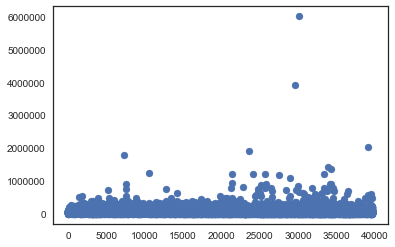

In [138]:
#scatter plot for annual income, outliers present
plt.scatter(data.index.tolist(),data['annual_inc'])
plt.show()

 <b>Observation</b> : There are two distinct outliers in the above graph which needs some treatment.

In [139]:
#Let us check if these fall under 99.5 percentile
quantile99 = data["annual_inc"].quantile(0.995)
quantile99

300000.0

<b>Observation</b> : The two outliers fall outside the 99.5 percentile. So we can take all the data from 0 to 99.5 percentile to get rid of this outliers which can impact our analysis

In [140]:
#Getting rid of outliers by considering only 99.5 percentile data
data = data[data["annual_inc"] < quantile99]
data["annual_inc"].describe()

count     38359.000000
mean      66156.572040
std       37321.342395
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      294000.000000
Name: annual_inc, dtype: float64

In [141]:
#Creating bins for annual_inc
data['annual_inc_range'] = createbins('annual_inc')

 ### Loan Amount Analysis

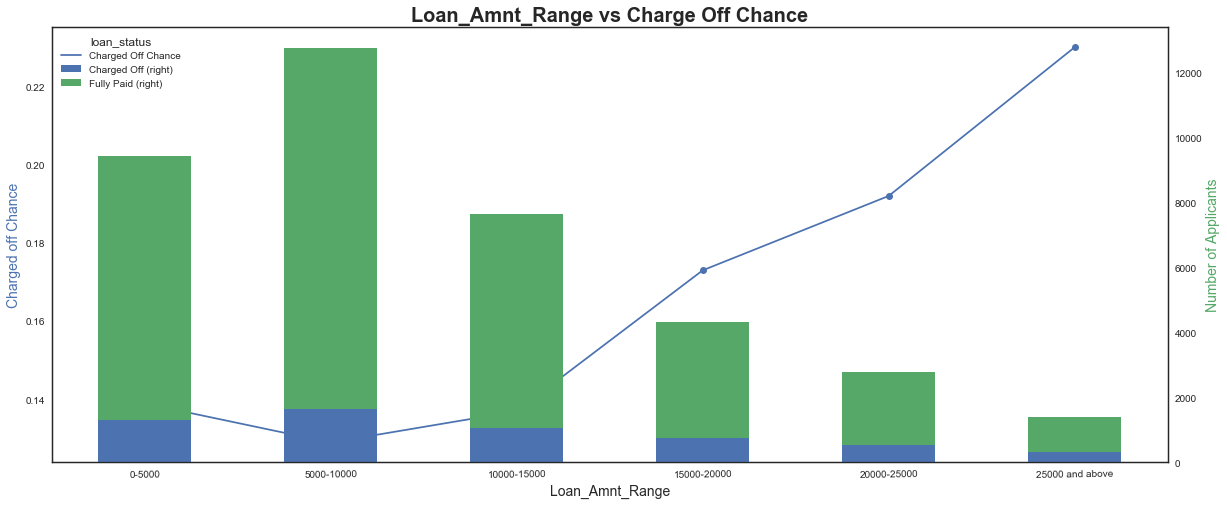

In [142]:
loan_amnt_range = crosstab(data,'loan_amnt_range')
#Bivariate anlaysis for loan_amnt_range
bivariate_prob(df =data,col ='loan_amnt_range')

<b>Observation</b> : High loan amount has higher chance of charge off.

### Term Analysis

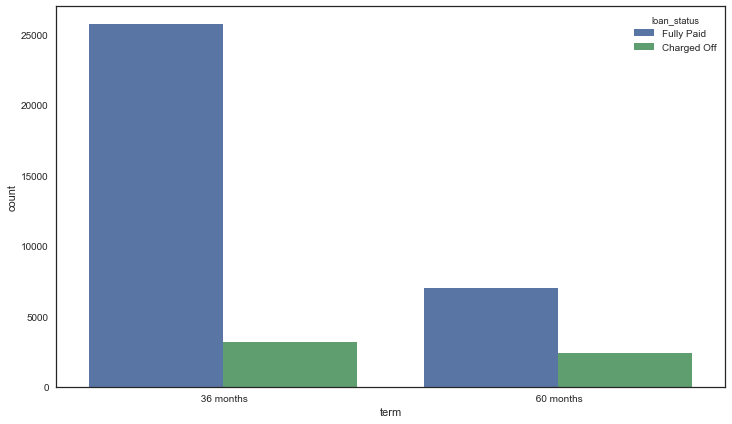

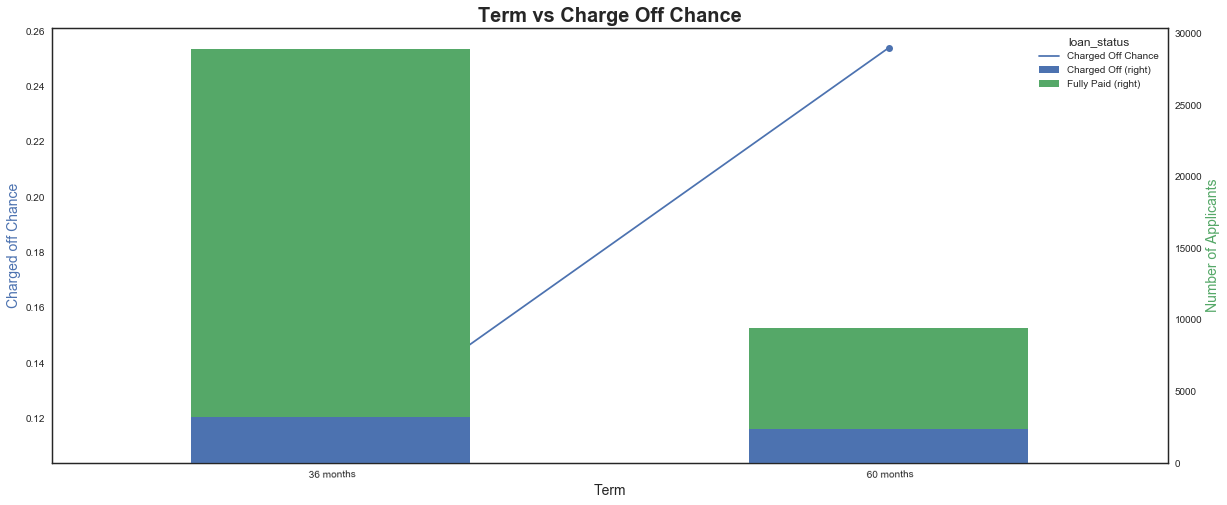

In [143]:
#Univariate analysis for term
uni_categorical(data,'term','loan_status')
#Bivariate analysis for term
bivariate_prob(data,'term')

<b>Observation</b>: Proportion of charged off loans is very high when term is 60 months as compared to 36 months.

 ### Grade Analysis

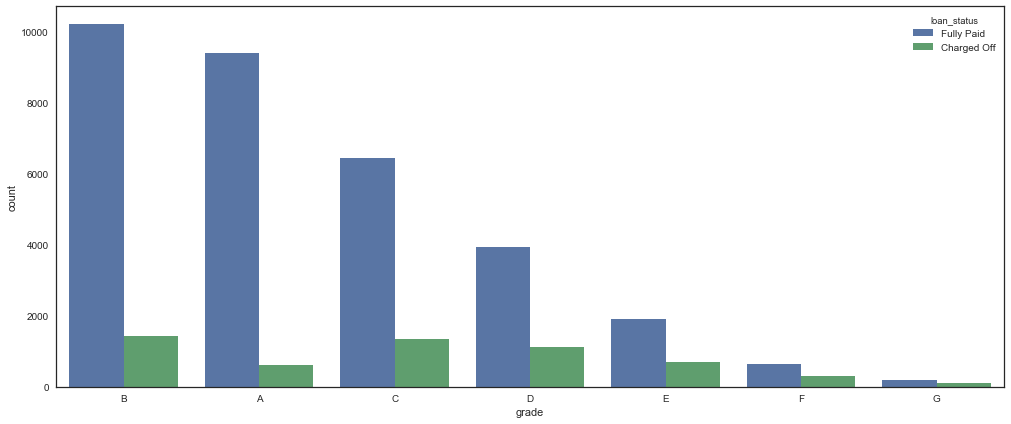

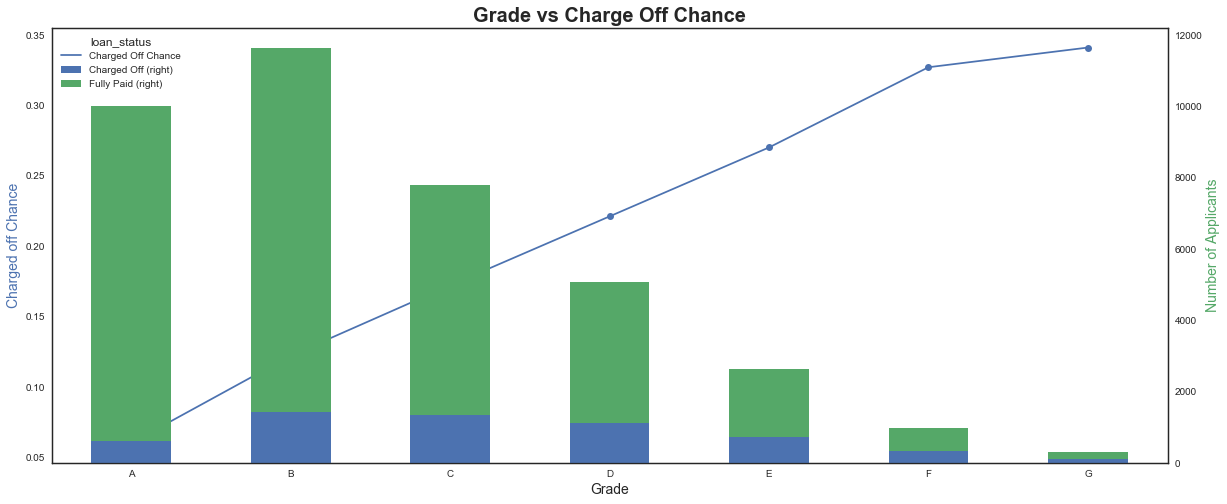

In [144]:
#Univariate analysis for grade
uni_categorical(data,'grade','loan_status')
#Bivariate analysis for grade
bivariate_prob(data,'grade')

<b>Observation</b> : Chances of charge off increase from grade A to G.As the grade increases,chances of risk are high which we can even see from above chart also.so for higher grade, interest rate is also high.

 ### Employee Length analysis

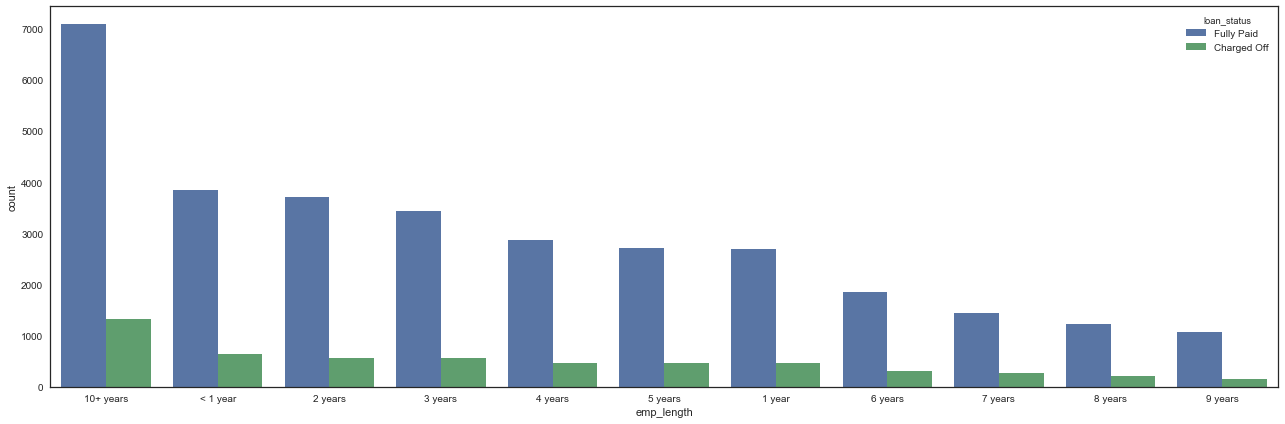

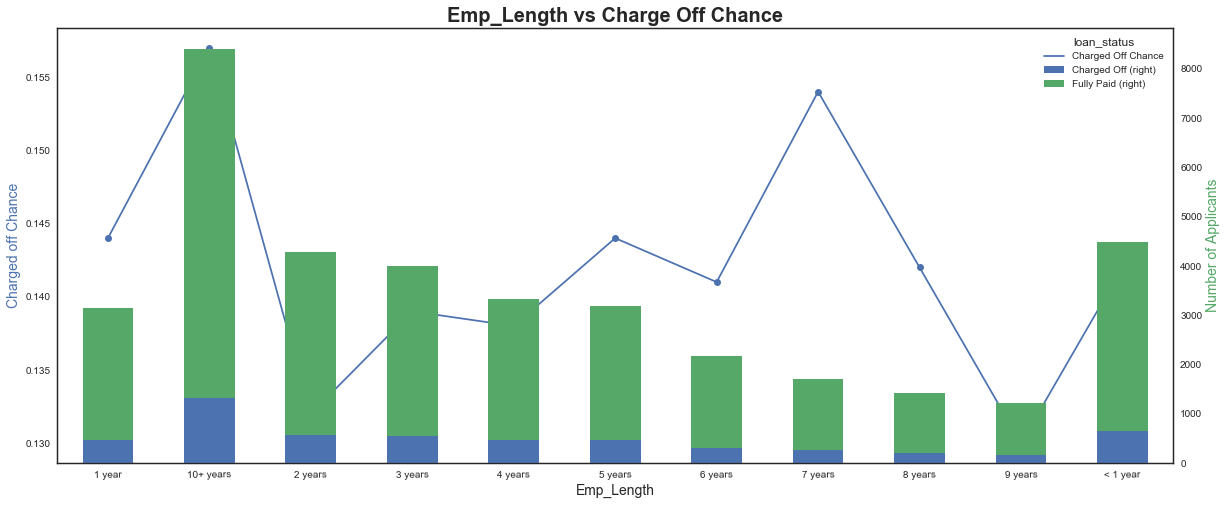

In [145]:
#Univariate analysis for emp_length
uni_categorical(data,'emp_length','loan_status')
#Bivariate analysis for emp_length
bivariate_prob(data,'emp_length')

<b>Observation</b> :
1. Applicants with good employment length pay back their loan
2. Employment length "n/a" and "<1 year" have high chance of charge off.

 ### Annual Income Analysis

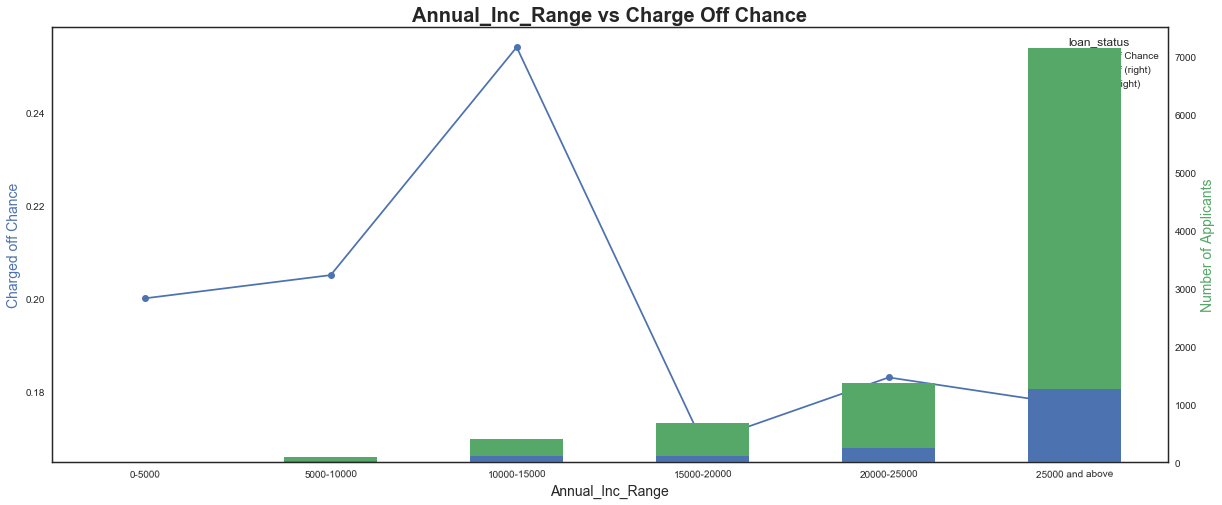

In [146]:
#Univariate analysis for annual_inc_range
annual_inc_range = crosstab(data,'annual_inc_range')
#Bivariate analysis for annual_inc_range
bivariate_prob(df=data,col ='annual_inc_range')

<b>Observation</b> : Charge off rate decreases with increase in income.

### Public record bankruptcies analysis

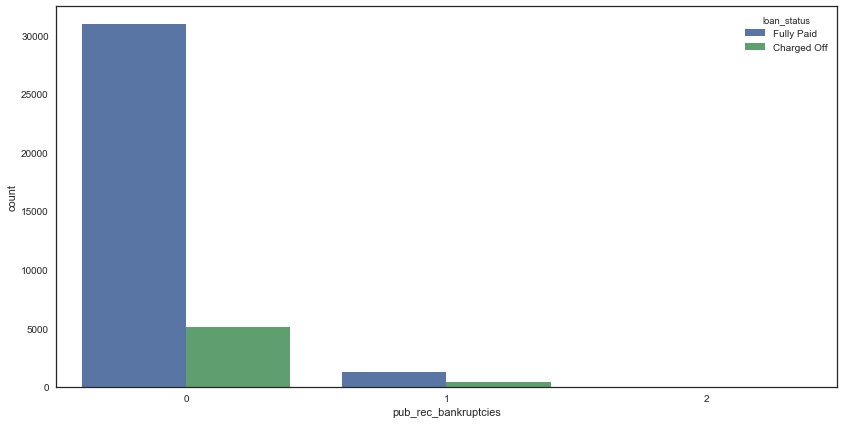

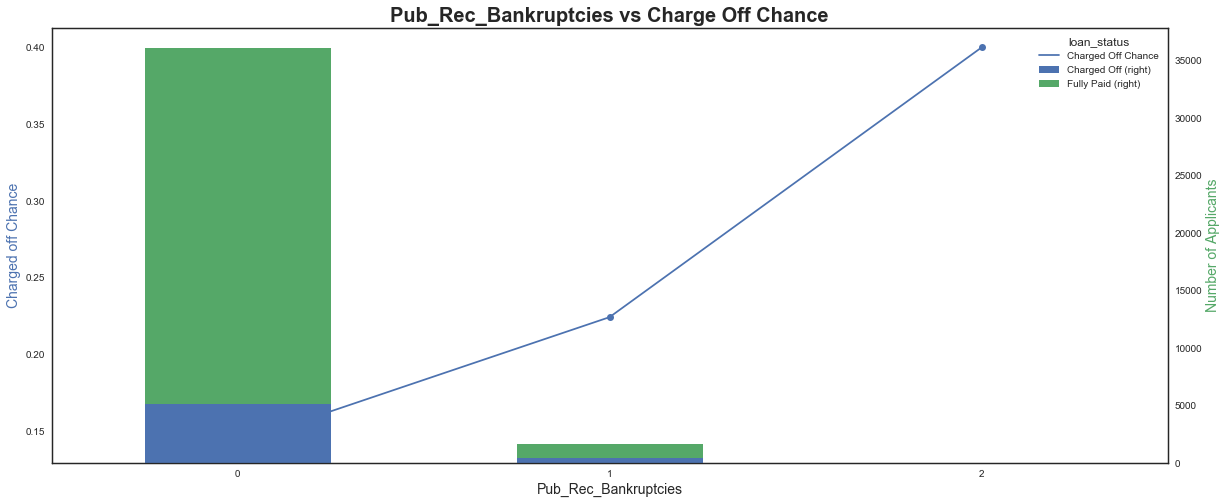

In [147]:
#Univariate analysis for pub_rec_bankruptcies
uni_categorical(data,'pub_rec_bankruptcies','loan_status')
#Bivariate analysis for pub_rec_bankruptcies
bivariate_prob(data,'pub_rec_bankruptcies')

<b>Observation</b> : Charge off rate increases with no of bankrupties which is expected.

 ### Loan Purpose Analysis

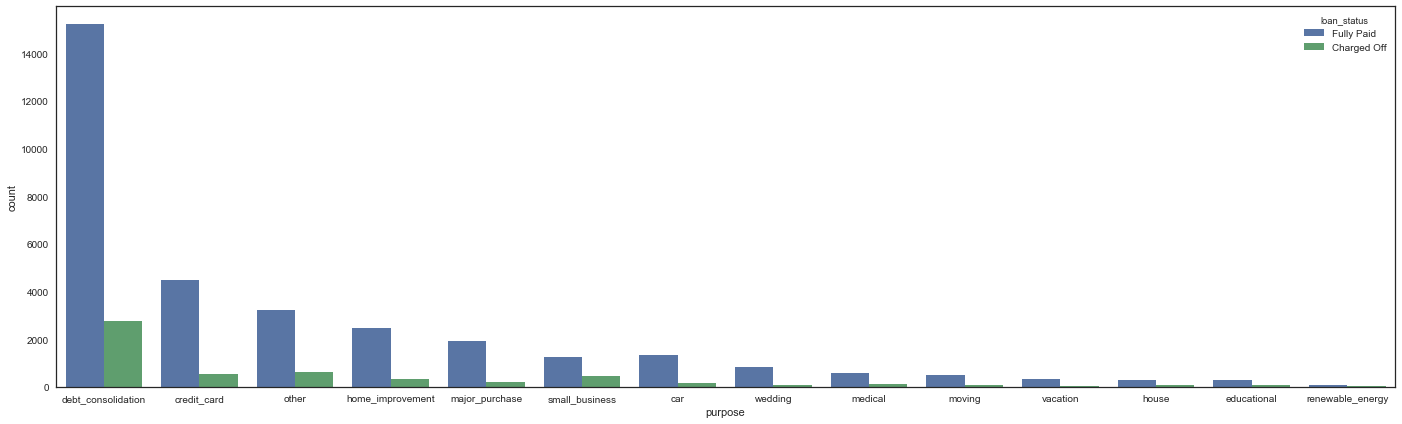

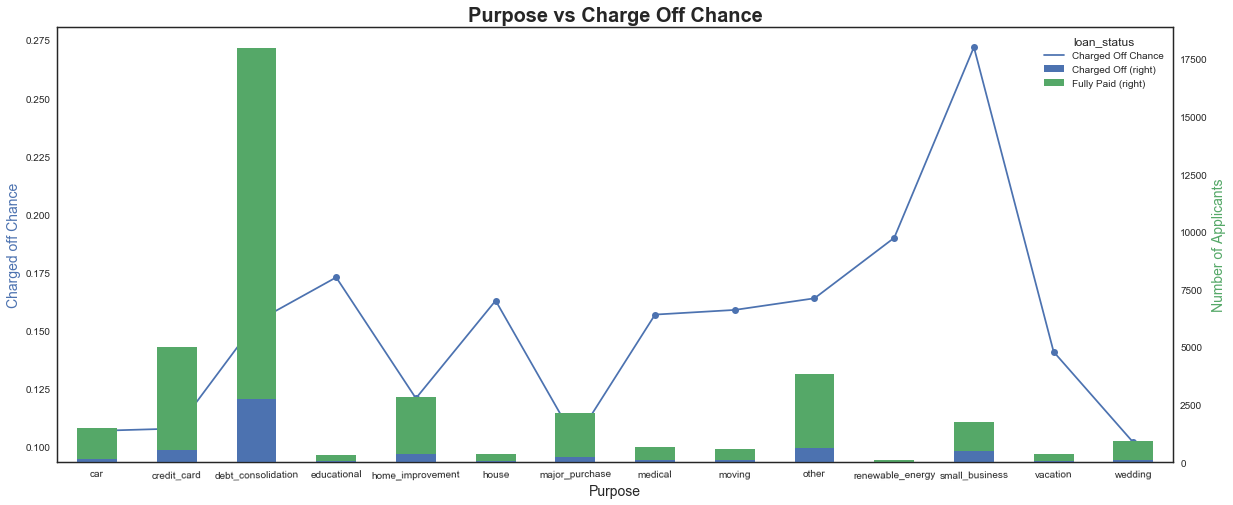

In [148]:
#Univariate analysis for loan purpose
uni_categorical(data,'purpose','loan_status')
#Bivariate analysis for loan purpose
bivariate_prob(data,'purpose')

<b>Observation</b>: Small business has very high charge off ratio. We can see here major charged off are in Debt consolidation,credit card and in small business

 ### Home Ownership Analysis

In [149]:
#lets see relations between home_ownership and loan status
loan_home_table = pd.crosstab(index=data["home_ownership"], 
                          columns=data["loan_status"]).sort_values('Fully Paid', ascending=True)

loan_home_table

loan_status,Charged Off,Fully Paid
home_ownership,,
NONE,0,3
OTHER,18,79
OWN,440,2517
MORTGAGE,2314,14558
RENT,2831,15599


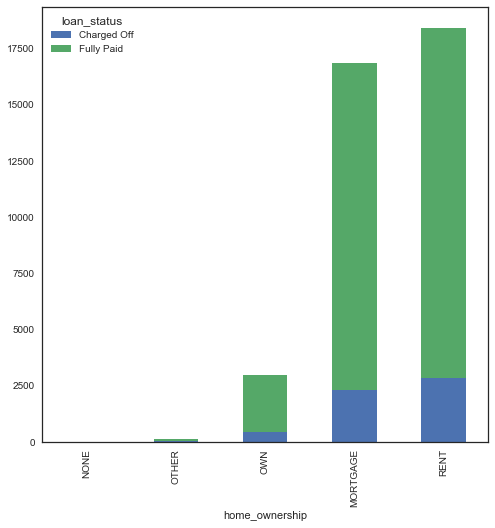

In [150]:
#Plot home_ownership vs loan_status
loan_home_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

<b>Observation</b> : Chances of charged-off is less for those who owns home

<h1><b>Conclusion</b></h1> 

Objective : Identify driving factors behind loan charge off.

Findings :

    Key Factors :
    
    1. Loan Term : High loan term tend to increase charge off.
    2. Grade : Higher grades tend to increase charge off.
    3. Length of Employment : Applicants with no data or employed less than year tend to have more charge off.
    4. Purpose : Small business tend to have more charge off.
    5. Annual Income : Higher income tends to reduce charge off.  
    6. Loan Amount : Higher Loan amount have higher tendency of charge off.
    7. Public Record of Bankruptcy : Higher no of bankruptcies have higher tendency of charge off.
    8. Home Ownership : Chances of charged-off is less for those who owns home.